<a href="https://colab.research.google.com/github/partizanos/multimedia_security/blob/master/multimedia_tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4 
## 1.1 Exercise
a) Read in a gray scale image x, for example liftingbody.png. It will serve as the host image


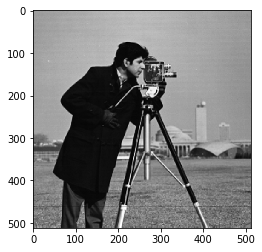

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import math

from skimage import data
cam = data.camera()
plt.imshow(cam, cmap= "gray")

N1, N2 = cam.shape

b) Generate a matrix w’ of size x with uniform distributed values {−1, 1}. The magnitude of these
two values governs the watermark strength.


In [0]:

x = int(np.sqrt(N1*N2))
w_prime = np.random.uniform(-1,1,x**2)
w_prime = w_prime.reshape((x, x))

 c) Randomly sample from matrix w’ with a given density $θ_N = 0.5$. The result is watermark w. The
watermark length N is defined as:
$N = (N _1 · N_ 2 ) · θ_N$
where $N _1$ and $N _2$ are the dimensions of host image x.


In [26]:
indices=[]
for i in range(int(x**2/2)):
  indices.append((np.random.randint(x), np.random.randint(x)))

#N = (N 1 · N 2 ) · θ N


w = np.zeros((N1,N2))
for tup in indices:
  w[tup] = w_prime[tup]

w.shape, w 

((512, 512), array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.42151186,  0.        ],
        [ 0.38172648, -0.13369882,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.98004499,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.13800212],
        [ 0.        ,  0.52838438,  0.        , ...,  0.        ,
          0.        , -0.32423091],
        [ 0.        ,  0.        ,  0.        , ..., -0.11808025,
          0.87031721,  0.        ]]))

 Embed the watermark w in to the host image x forming watermarked image y:
y = x + w


In [27]:
y = cam + w 
y.shape

(512, 512)

• Generate a matrix z with Additive White Gaussian Noise (AWGN):
2
z ∼ N (μ, σ noise
I)
(3)
2
where μ = 0 and σ noise
= 1.


In [0]:
z = np.random.normal(0, 1, N1*N2)
z=z.reshape((N1, N2))

• Add the AWGN matrix z to the watermarked image y, resulting in attacked image v:
v = y + z = x + w + z
(4)


In [0]:
v = y + z

• Show the original image x, the watermarked image y and the attacked watermarked image v on
the screen. What do you see?

Answer very small changes visuallya and i performed mse just to make sure there is actual difference 

1.127866313429621

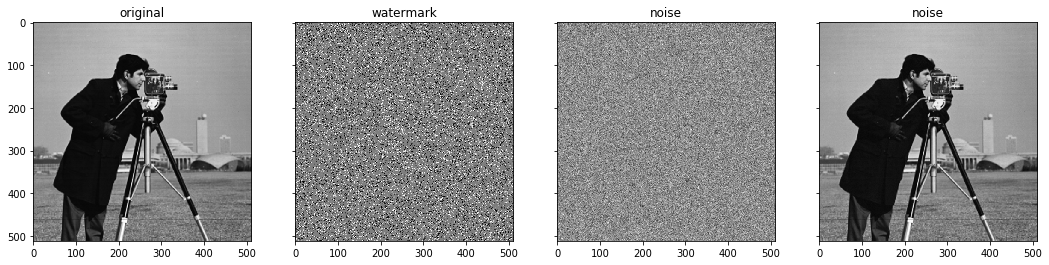

In [35]:
fig, ax = plt.subplots(
        ncols=4, 
        sharex=True, 
        sharey=True,
        figsize=(18, 18)
)

ax[0].imshow(cam.data, 'gray')
ax[0].set_title("original")
ax[1].imshow(w, 'gray')
ax[1].set_title("watermark")
ax[2].imshow(z, 'gray')
ax[2].set_title("noise")
ax[3].imshow(v, 'gray')
ax[3].set_title("noise")


def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

mse(cam,v) # assert that image is not same 


# 2 Non-blind watermark detection
In this set exercises you will attack a watermarked image leveraging knowledge of the original image.
See Figure 1.



• Extract the estimated watermark ŵ from the marked image v using the original image $$x:
ŵ_{non−blind} = v − x$$



In [42]:
w_non_blind = v - cam 
w_non_blind

array([[ 0.14000162,  0.3724673 , -0.44801474, ..., -0.97891256,
         0.30055527,  0.32374731],
       [ 0.300522  ,  0.24400286,  0.00480362, ..., -0.89153427,
        -1.77025817,  0.13883017],
       [-0.10317513, -1.22187773,  0.06073676, ...,  0.65548579,
         0.44732334, -1.1684287 ],
       ...,
       [ 0.74001959, -1.3062197 ,  2.32586602, ..., -0.03225278,
        -1.32635779, -0.66679064],
       [ 1.08575297,  0.60534486, -0.53709185, ..., -0.74561139,
         0.10171548,  0.20436641],
       [-0.54516672, -0.9193041 , -0.96174383, ..., -0.46139786,
         1.47022655,  0.95893363]])

Determine the linear correlation ρ non−blind between the original watermark w and the estimated
watermark $ ŵ_{non−blind} $ :

$ \rho _ {non - blind }  = \frac{1}{N} \sum^N_{k=1}{ ŵ_{non−blind}[k]  w[k]} $

In [47]:
rho_non_blind = np.sum(w.reshape((N1*N2))*w_non_blind.reshape((N1*N2))) / (N1*N2) 
rho_non_blind

0.13117135312653563

## 3 Blind watermark detection using the Maximum Likelihood estimate
This exercise will introduce a simple method to blindly estimated a watermark when one only has access
to the marked image. See Figure 2.

### 3.1  
Given only the marked image v, blindly estimate the watermark ŵ blind using the following formula:

 $ ŵ_{blind} = v − v̄ $  where v̄ is the local mean of marked image v. 
 


In [61]:
from scipy import signal

# v_prime = 
# ŵ_blind = v
np.mean(v)

res = signal.convolve2d(v, np.ones((3,3)), boundary='symm', mode='same')
res.shape, res 


# np.ones((3,3))

array([[1409.14998794, 1418.67823684, 1427.13998596, ..., 1361.69125945,
        1364.76781778, 1368.40350197],
       [1411.06928942, 1415.34946657, 1418.60537088, ..., 1366.50085386,
        1365.05680819, 1365.565918  ],
       [1414.97287922, 1411.27572196, 1406.06886131, ..., 1375.34868026,
        1368.11263258, 1367.84430985],
       ...,
       [1088.02403596, 1112.28663019, 1134.83588643, ..., 1094.62390919,
        1033.17669383, 1001.47224995],
       [1095.94103275, 1110.48745726, 1123.52421586, ..., 1092.64053609,
        1034.50283163, 1006.23860306],
       [1093.75757573, 1106.3015767 , 1117.59205767, ..., 1098.51070082,
        1038.49599515, 1012.28663593]])

 Why can you assume that v̄ = x?
   
 ***Answer***
 
 Marked image:  $ v = y + z = x + w + z$

### 3.2 Exercise
• Determine the linear correlation ρ blind between the original watermark w and the blindly estimated
watermark ŵ blind :

What can you say about the difference between blind and non-blind watermark detection in terms
of the linear correlations ρ blind and ρ non−blind ?